In [53]:
import random
import pandas as pd
import numpy as np
import os
from glob import glob
import datetime
import matplotlib.pyplot as plt

In [45]:
def make_dataset(all_input_list, all_target_list):
    '''
    Train, Test데이터를 하나의 데이터 프레임으로 변경
    '''
    df_all = pd.DataFrame()
    length = len(all_input_list)
    for idx in range(length):
        X = pd.read_csv(all_input_list[idx])
        y = pd.read_csv(all_target_list[idx])
        y['DAT'] = y['DAT']-1
        df_concat = pd.merge(X, y, on='DAT', how='left')
        df_concat['Case'] = idx+1
        df_all = pd.concat([df_all, df_concat])
    return df_all


def time_value(df):
    ''' 
    ex) 00:59:59 => 01:00:00으로 변환 후 시간단위만 추출
    '''
    df['obs_time'] = pd.to_datetime(df["obs_time"]) + datetime.timedelta(seconds=1)
    df['obs_time'] = df['obs_time'].dt.hour
    return df

def limit_range(df):
    '''
    환경 변수 별 제한 범위를 넘어서는 값을 결측치 처리
    '''
    df.loc[(df['내부온도관측치'] < 4) | (df['내부온도관측치'] > 40), '내부온도관측치'] = np.nan
    df.loc[(df['내부습도관측치'] < 0) | (df['내부습도관측치'] > 100), '내부습도관측치'] = np.nan
    df.loc[(df['co2관측치'] < 0) | (df['co2관측치'] > 1200), 'co2관측치'] = np.nan
    df.loc[(df['ec관측치'] < 0) | (df['ec관측치'] > 8), 'ec관측치'] = np.nan
    df.loc[(df['시간당분무량'] < 0) | (df['시간당분무량'] > 3000), '시간당분무량'] = np.nan
    df.loc[(df['일간누적분무량'] < 0) | (df['일간누적분무량'] > 72000), '일간누적분무량'] = np.nan
    df.loc[(df['시간당백색광량'] < 0) | (df['시간당백색광량'] > 120000), '시간당백색광량'] = np.nan
    df.loc[(df['일간누적백색광량'] < 0) | (df['일간누적백색광량'] > 2880000), '일간누적백색광량'] = np.nan
    df.loc[(df['시간당적색광량'] < 0) | (df['시간당적색광량'] > 120000), '시간당적색광량'] = np.nan
    df.loc[(df['일간누적적색광량'] < 0) | (df['일간누적적색광량'] > 2880000), '일간누적적색광량'] = np.nan
    df.loc[(df['시간당청색광량'] < 0) | (df['시간당청색광량'] > 120000), '시간당청색광량'] = np.nan
    df.loc[(df['일간누적청색광량'] < 0) | (df['일간누적청색광량'] > 2880000), '일간누적청색광량'] = np.nan
    df.loc[(df['시간당총광량'] < 0) | (df['시간당총광량'] > 120000), '시간당총광량'] = np.nan
    df.loc[(df['일간누적총광량'] < 0) | (df['일간누적총광량'] > 2880000), '일간누적총광량'] = np.nan
    return df

In [46]:
train_input_list = sorted(glob('./data/train_input/*.csv'))
train_target_list = sorted(glob('./data/train_target/*.csv'))

test_input_list = sorted(glob('./data/test_input/*.csv'))
test_target_list = sorted(glob('./data/test_target/*.csv'))

In [47]:
train = make_dataset(train_input_list, train_target_list)
test = make_dataset(test_input_list, test_target_list)

train = time_value(train)
test = time_value(test)

train = limit_range(train)
test = limit_range(test)

In [54]:
train

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량,predicted_weight_g,Case
0,0,0,25.300000,81.835000,536.016667,1.407439,0.0,0.00,0.0000,0.000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.167719,1
1,0,1,25.680357,81.264286,528.696429,1.409003,126.0,126.00,0.0000,0.000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.167719,1
2,0,2,25.273333,81.471666,532.833333,1.406913,0.0,126.00,0.0000,0.000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.167719,1
3,0,3,25.355000,81.398334,545.566667,1.406689,126.0,252.00,0.0000,0.000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.167719,1
4,0,4,25.391667,81.483333,558.583333,1.411070,0.0,252.00,0.0000,0.000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.167719,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,27,19,26.030000,58.736667,448.500000,1.195415,0.0,2543.12,12.3764,146722.222,0.0,22253.7504,0.0,10462.6535,12.3764,179438.6259,86.591508,28
668,27,20,27.341666,58.373334,449.183333,1.190780,126.0,2669.12,0.0000,146722.222,0.0,22253.7504,0.0,10462.6535,0.0000,179438.6259,86.591508,28
669,27,21,27.785000,58.711667,441.933333,1.185593,0.0,2669.12,0.0000,146722.222,0.0,22253.7504,0.0,10462.6535,0.0000,179438.6259,86.591508,28
670,27,22,28.480000,58.121667,437.600000,1.179664,0.0,2669.12,0.0000,146722.222,0.0,22253.7504,0.0,10462.6535,0.0000,179438.6259,86.591508,28


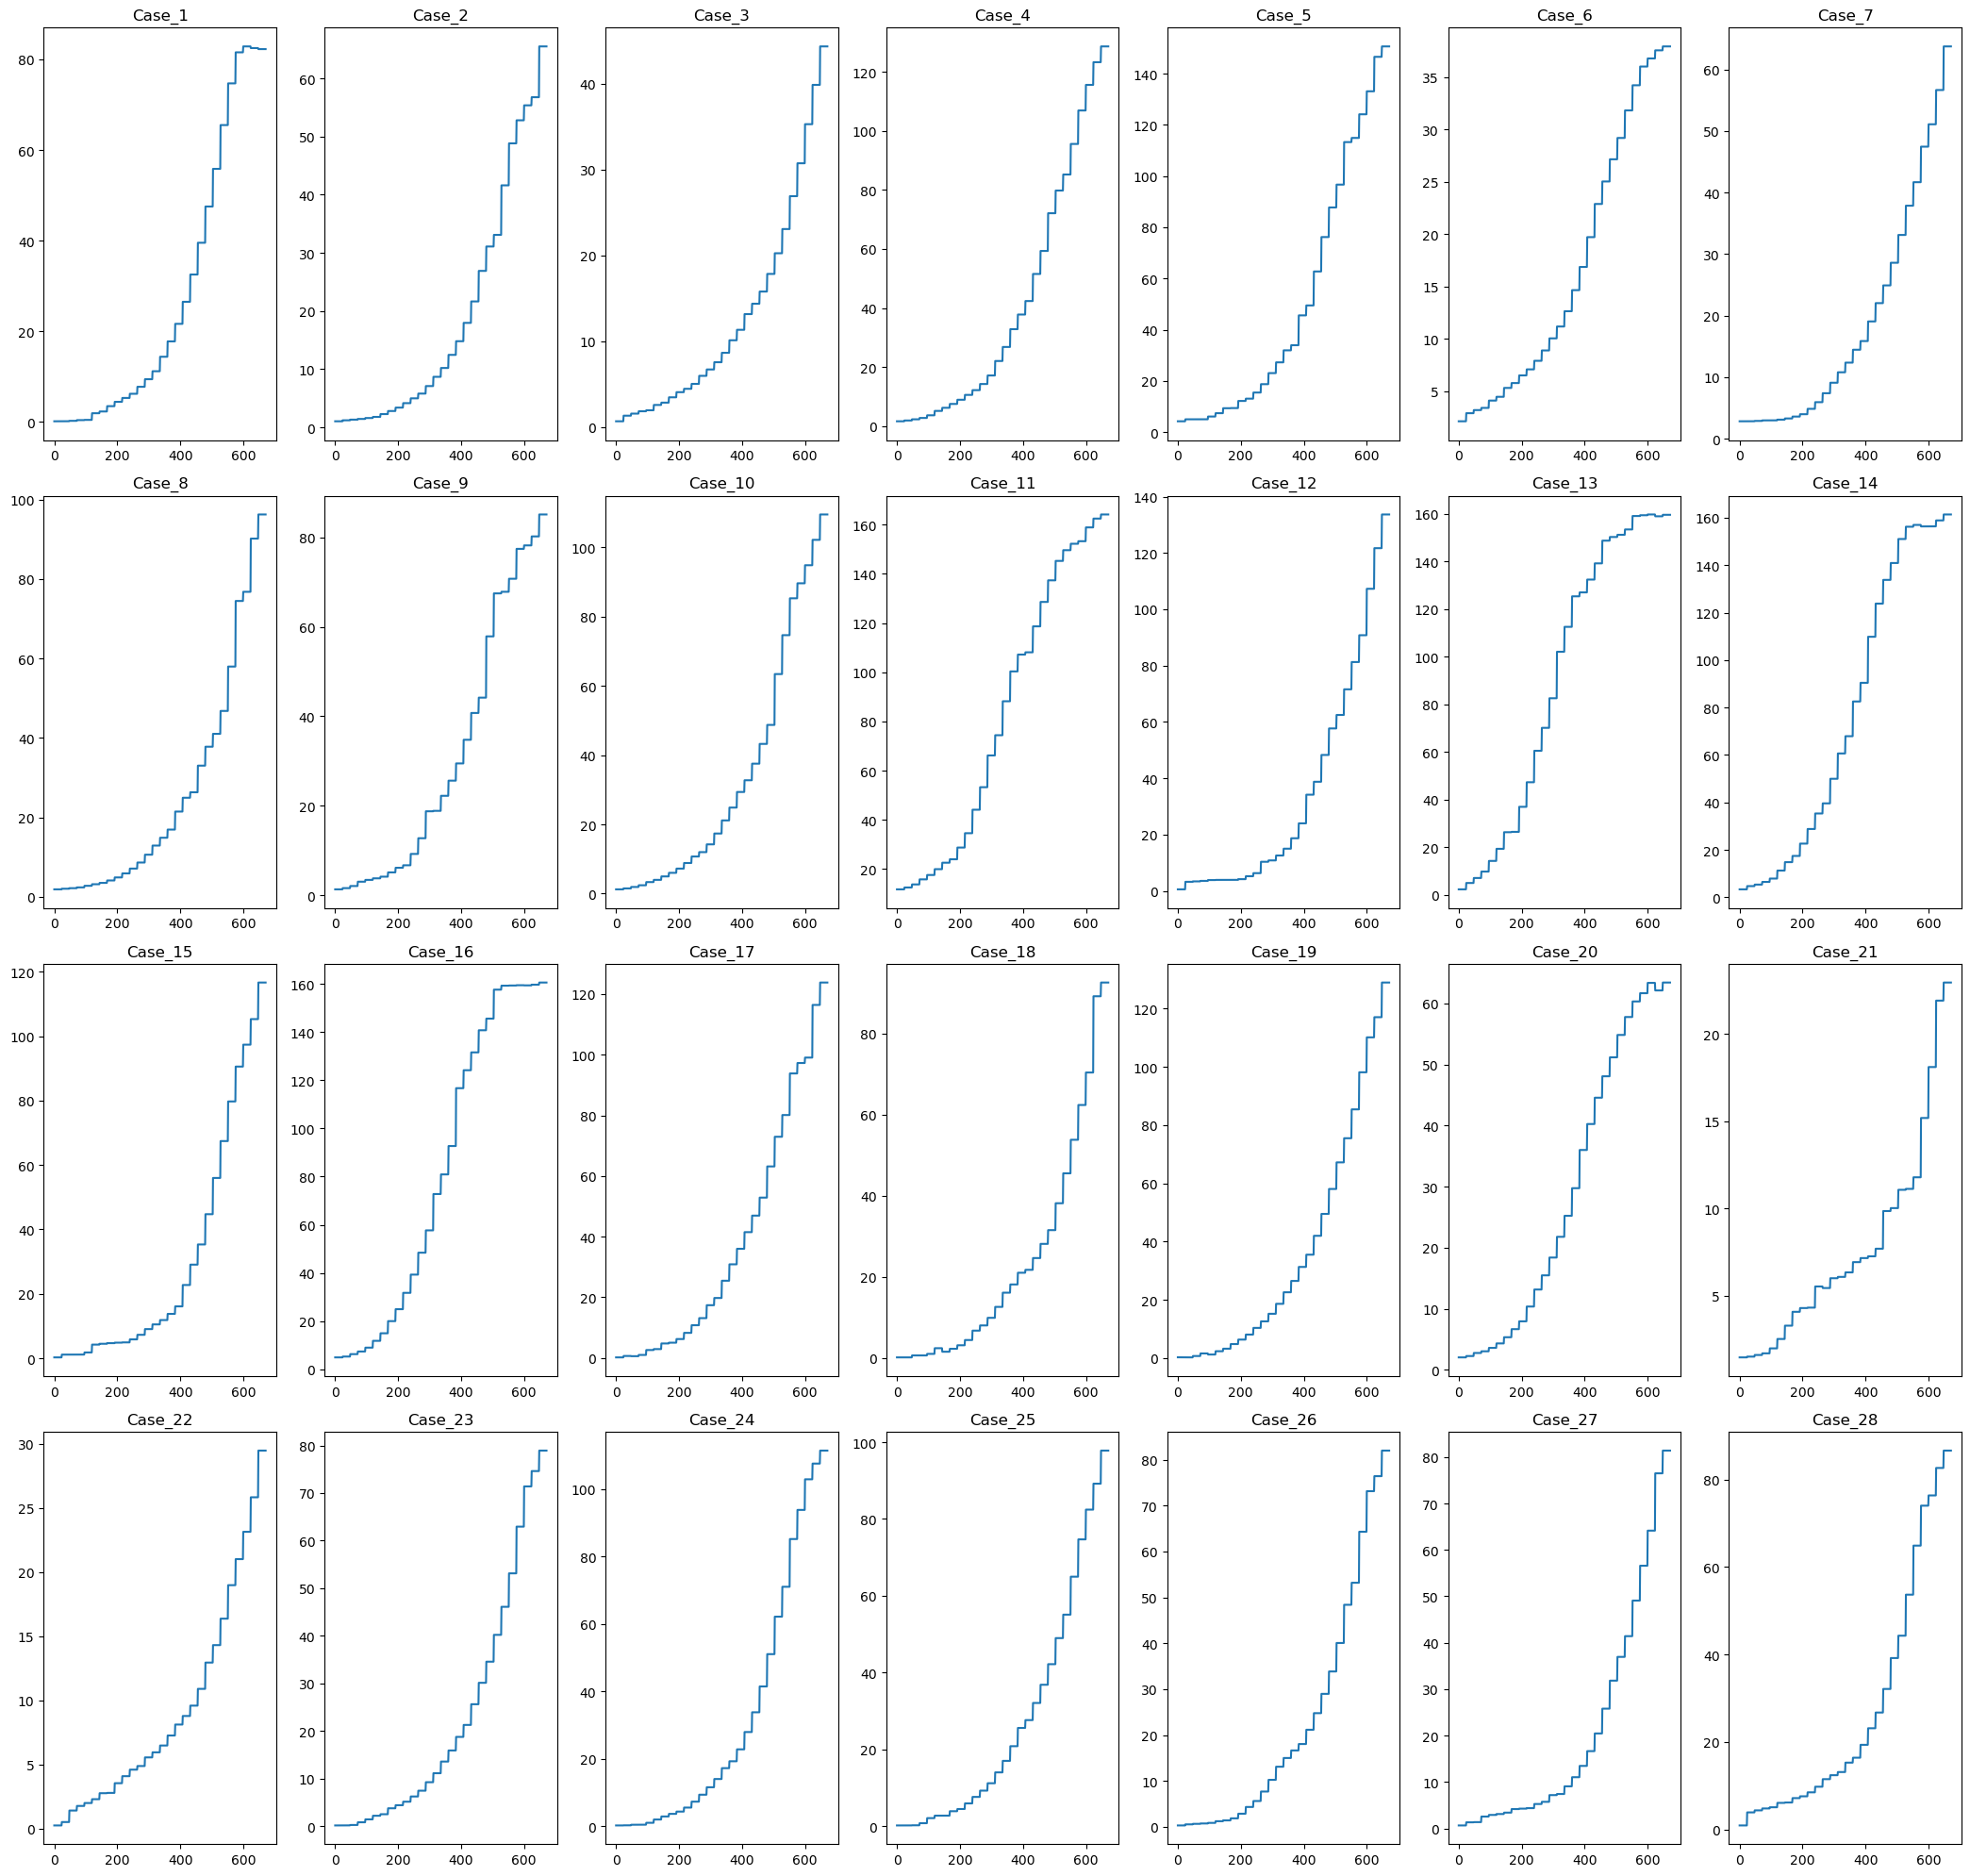

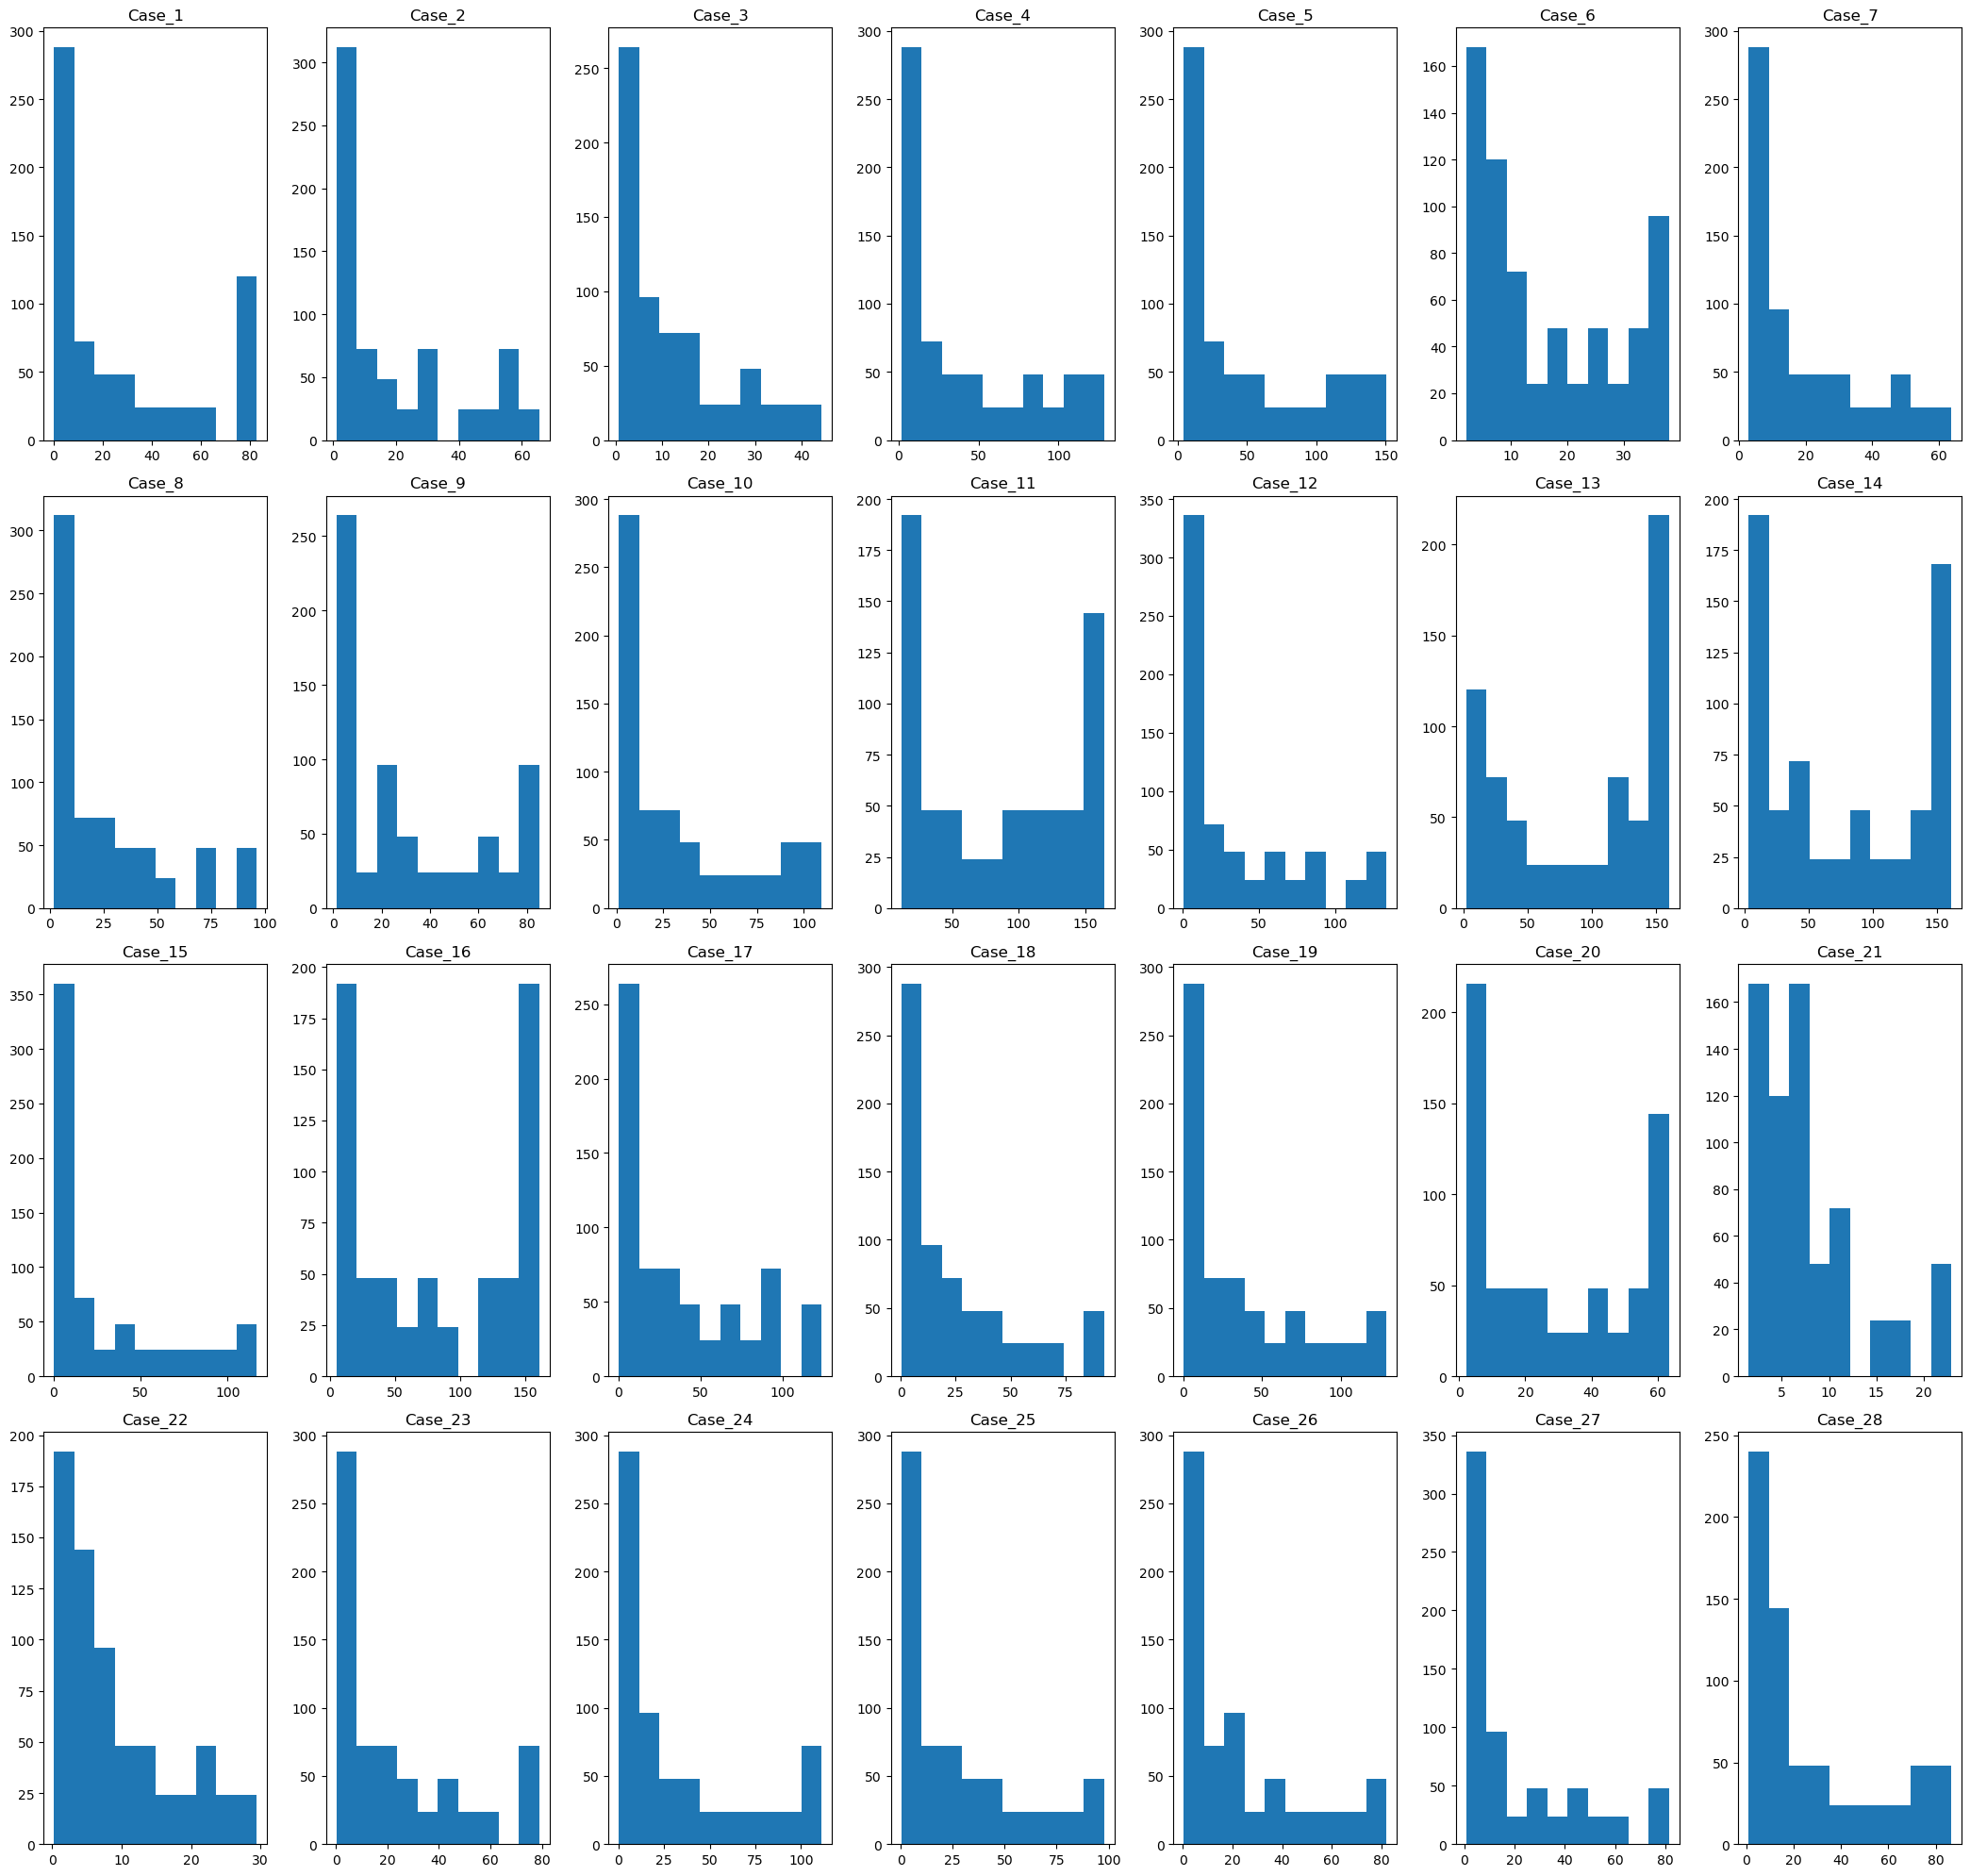

In [56]:
fig, axs = plt.subplots(nrows=4, ncols=7, figsize=(21,20))
axs = axs.ravel(order='C')
for i, v in enumerate(train["Case"].unique()):
    axs[i].plot(train["predicted_weight_g"][train["Case"]==v].reset_index(drop=True))
    axs[i].set_title(f"Case_{v}")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=4, ncols=7, figsize=(21,20))
axs = axs.ravel(order='C')
for i, v in enumerate(train["Case"].unique()):
    axs[i].hist(train["predicted_weight_g"][train["Case"]==v].reset_index(drop=True))
    axs[i].set_title(f"Case_{v}")
plt.tight_layout()
plt.show()